In [122]:
# 서울시 강남구의 삼성약국 추출
# 서울특별시 강남구 - encoding 필요 quote()
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
# 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [10]:
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?'
serviceKey = 'h2mLc7vL1zItTKcrj91QtEN1LzL9XmC2%2Fr5OfMz5Z2qYxdT6y6zGQDoGbayFwP2wUzDVzDlPvfvkH%2BKt6hcPdw%3D%3D'

In [3]:
Q0 = quote('서울특별시')
Q1 = quote('강남구')
QT = '1'
QN = quote('삼성약국')
ORD = 'NAME'
numofRows = '500'

In [15]:
# parameter
paramset = 'serviceKey=' + serviceKey + '&' \
            + 'Q0=' + Q0 + '&' \
            + 'Q1=' + Q1 + '&' \
            + 'QT=' + QT + '&' \
            + 'QN=' + QN + '&' \
            + 'ORD=' + ORD + '&' \
            + 'numofRows=' + numofRows

In [16]:
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?serviceKey=h2mLc7vL1zItTKcrj91QtEN1LzL9XmC2%2Fr5OfMz5Z2qYxdT6y6zGQDoGbayFwP2wUzDVzDlPvfvkH%2BKt6hcPdw%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&Q1=%EA%B0%95%EB%82%A8%EA%B5%AC&QT=1&QN=%EC%82%BC%EC%84%B1%EC%95%BD%EA%B5%AD&ORD=NAME&numofRows=500'

In [17]:
result=requests.get(url)
bs_obj=BeautifulSoup(result.content,'html.parser')
bs_obj

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><dutyaddr>서울특별시 강남구 일원로 53 (일원동) </dutyaddr><dutymapimg>소림빌딩 1층</dutymapimg><dutyname>E-삼성약국</dutyname><dutytel1>02-3412-1254</dutytel1><dutytime1c>1900</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>1900</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>1900</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>1900</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>1900</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1300</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1104799</hpid><postcdn1>063</postcdn1><postcdn2>43 </postcdn2><rnum>1</rnum><wgs84lat>37.48926299528938</wgs84lat><wgs84lon>127.08181088280385</wgs84lon></item><item><dutyaddr>서울특별시 강남구 광평로19길 10, 101호 (수서동, 까치마을아파트상가)</dutyaddr><dutymapimg>삼성의료원10번출근처/까치마을아파트상가 101호</dutymapimg><dutyname>삼성약국</dutyname><dutytel1>02-451-7281</dutytel1><dutyt

In [ ]:
# ------------------서울시 전체 약국 정보

In [42]:
endpoint = 'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?'
serviceKey = 'h2mLc7vL1zItTKcrj91QtEN1LzL9XmC2%2Fr5OfMz5Z2qYxdT6y6zGQDoGbayFwP2wUzDVzDlPvfvkH%2BKt6hcPdw%3D%3D'

In [43]:
Q0 = quote('서울특별시')
ORD = 'NAME'
numofRows = '5000'
startPage = '1'
paseSize = '10'

In [65]:
# parameter
paramset = 'serviceKey=' + serviceKey + '&' \
            + 'Q0=' + Q0 + '&' \
            + 'ORD=' + ORD + '&' \
            + 'startPage=' + startPage +'&' \
            + 'paseSize=' + pageSize + '&' \
            + 'numOfRows=' + numofRows

In [66]:
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?serviceKey=h2mLc7vL1zItTKcrj91QtEN1LzL9XmC2%2Fr5OfMz5Z2qYxdT6y6zGQDoGbayFwP2wUzDVzDlPvfvkH%2BKt6hcPdw%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&ORD=NAME&startPage=1&paseSize=10&numOfRows=5000'

In [68]:
result=requests.get(url)
bs_obj=BeautifulSoup(result.content,'html.parser')

In [70]:
# 모든 약국 정보 추출
items = bs_obj.findAll('item')
len(items)

4937

In [71]:
# 약국 정보 저장
name =[]
adr = []
tel = []

for item in items : 
    name.append(item.find('dutyname').text)
    adr.append(item.find('dutyaddr').text)
    tel.append(item.find('dutytel1').text)
df = pd.DataFrame({'약국명':name,'주소':adr,'전화번호':tel})

In [72]:
df

,약국명,주소,전화번호
0,100세약국,"서울특별시 영등포구 양평로 24, (당산동6가)",02-2678-8217
1,13층약국,"서울특별시 중구 서소문로 116, 유원빌딩 1304호 (서소문동)",070-7718-1316
2,153온누리약국,"서울특별시 성동구 왕십리로 410, K동 106호 (하왕십리동, 센트라스)",02-2291-9153
3,1번약국,서울특별시 구로구 구로동로 132 (구로동),02-851-1155
4,1번약국,서울특별시 관악구 남부순환로 1832 1층,02-872-7583
...,...,...,...
4932,힘찬약국,서울특별시 영등포구 디지털로37길 9-5 (대림동),02-2062-7789
4933,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588
4934,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114
4935,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221


In [ ]:
# 서울시에서 토요일에 영업하는 약국의 수를 출력
# 서울시 각 구별로 약국의 수를 비교하는 그래프 시각화 작업

In [78]:
Q0 = quote('서울특별시')
QT = '6'
ORD = 'NAME'
numofRows = '5000'
startPage = '1'
paseSize = '10'

In [79]:
# parameter
paramset = 'serviceKey=' + serviceKey + '&' \
            + 'Q0=' + Q0 + '&' \
            + 'QT=' + QT + '&' \
            + 'ORD=' + ORD + '&' \
            + 'startPage=' + startPage +'&' \
            + 'paseSize=' + pageSize + '&' \
            + 'numOfRows=' + numofRows

In [80]:
url = endpoint + paramset
url

'http://apis.data.go.kr/B552657/ErmctInsttInfoInqireService/getParmacyListInfoInqire?serviceKey=h2mLc7vL1zItTKcrj91QtEN1LzL9XmC2%2Fr5OfMz5Z2qYxdT6y6zGQDoGbayFwP2wUzDVzDlPvfvkH%2BKt6hcPdw%3D%3D&Q0=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&QT=6&ORD=NAME&startPage=1&paseSize=10&numOfRows=5000'

In [81]:
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')

In [82]:
items = bs_obj.findAll('item')
len(items)

4417

In [84]:
items[1]

<item><dutyaddr>서울특별시 관악구 남부순환로 1832 1층</dutyaddr><dutyname>1번약국</dutyname><dutytel1>02-872-7583</dutytel1><dutytime1c>2100</dutytime1c><dutytime1s>0900</dutytime1s><dutytime2c>2100</dutytime2c><dutytime2s>0900</dutytime2s><dutytime3c>2100</dutytime3c><dutytime3s>0900</dutytime3s><dutytime4c>2100</dutytime4c><dutytime4s>0900</dutytime4s><dutytime5c>2100</dutytime5c><dutytime5s>0900</dutytime5s><dutytime6c>1730</dutytime6c><dutytime6s>0900</dutytime6s><hpid>C1104416</hpid><postcdn1>087</postcdn1><postcdn2>88 </postcdn2><rnum>2</rnum><wgs84lat>37.480704569</wgs84lat><wgs84lon>126.9534959421</wgs84lon></item>

In [86]:
name = []
adr = []
tel = []

for item in items :
    name.append(item.find('dutyname').text)
    adr.append(item.find('dutyaddr').text)
    tel.append(item.find('dutytel1').text)
df = pd.DataFrame({'약국명':name, '주소': adr, '전화번호' :tel})

In [165]:
df

,약국명,주소,전화번호
0,100세약국,"서울특별시 영등포구 양평로 24, (당산동6가)",02-2678-8217
1,1번약국,서울특별시 관악구 남부순환로 1832 1층,02-872-7583
2,1번약국,서울특별시 구로구 구로동로 132 (구로동),02-851-1155
3,1층엔약국,"서울특별시 강남구 강남대로 624, ICT TOWER 1층 일부호 (신사동)",02-518-1080
4,1층천호약국,"서울특별시 강동구 천호대로 1006, 브라운스톤천호 105호 (성내동)",02-478-1178
...,...,...,...
4412,힘찬약국,서울특별시 영등포구 디지털로37길 9-5 (대림동),02-2062-7789
4413,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114
4414,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588
4415,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221


In [200]:
address = df['주소']
address.str.split(' ')

0                        [서울특별시, 영등포구, 양평로, 24,, (당산동6가)]
1                           [서울특별시, 관악구, 남부순환로, 1832, 1층]
2                          [서울특별시, 구로구, 구로동로, 132, (구로동)]
3       [서울특별시, 강남구, 강남대로, 624,, ICT, TOWER, 1층, 일부호, ...
4         [서울특별시, 강동구, 천호대로, 1006,, 브라운스톤천호, 105호, (성내동)]
                              ...                        
4412                   [서울특별시, 영등포구, 디지털로37길, 9-5, (대림동)]
4413    [서울특별시, 도봉구, 삼양로, 580-4,, 1층, 101호, (쌍문동,, 노스브릭)]
4414       [서울특별시, 중구, 장충단로13길, 7,, 401호, (을지로6가,, 을호빌딩)]
4415                 [서울특별시, 광진구, 뚝섬로, 631-1,, 1층, (자양동)]
4416                             [서울특별시, 성북구, 보국문로, 16-1]
Name: 주소, Length: 4417, dtype: object

In [201]:
gu = address.str.split(' ').str.get(1)
gu

0       영등포구
1        관악구
2        구로구
3        강남구
4        강동구
        ... 
4412    영등포구
4413     도봉구
4414      중구
4415     광진구
4416     성북구
Name: 주소, Length: 4417, dtype: object

In [230]:
count = df.value_counts(gu)
count = pd.DataFrame(count).reset_index()
count.columns = ['구 명','약국 수']
count

,구 명,약국 수
0,강남구,337
1,송파구,311
2,강서구,235
3,영등포구,228
4,서초구,216
5,관악구,202
6,강동구,198
7,노원구,195
8,성북구,180
9,마포구,175


<function matplotlib.pyplot.show(close=None, block=None)>

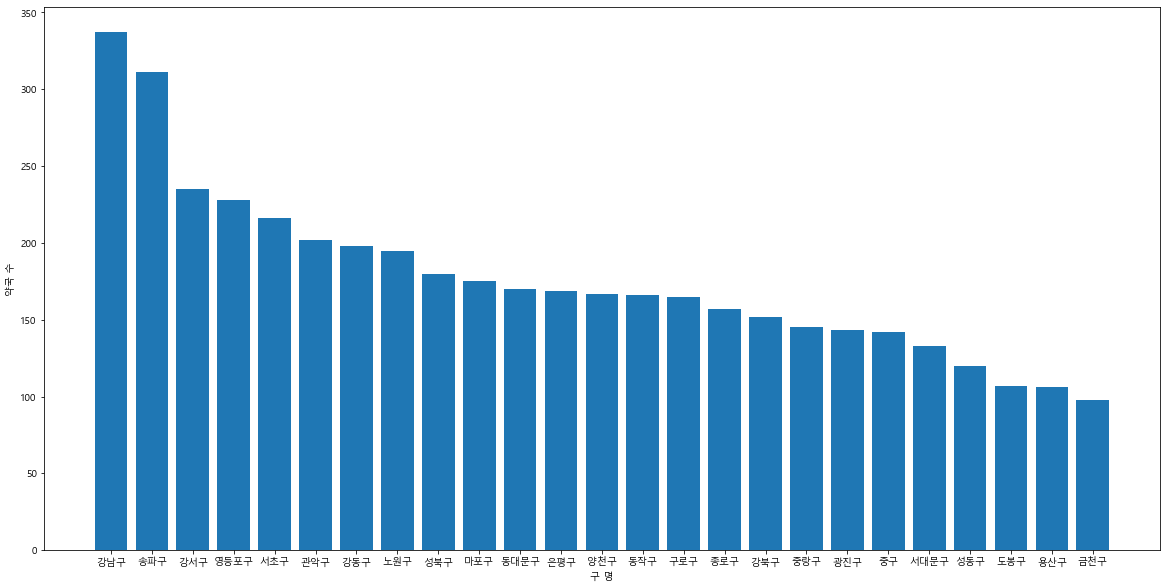

In [232]:
plt.figure(figsize=(20,10))
plt.bar(count['구 명'], count['약국 수'])
plt.xlabel('구 명')
plt.ylabel('약국 수')
plt.show

In [ ]:
# --------------------- 강사님 설명 참고

In [167]:
df['구'] = gu
df

,약국명,주소,전화번호,구
0,100세약국,"서울특별시 영등포구 양평로 24, (당산동6가)",02-2678-8217,영등포구
1,1번약국,서울특별시 관악구 남부순환로 1832 1층,02-872-7583,관악구
2,1번약국,서울특별시 구로구 구로동로 132 (구로동),02-851-1155,구로구
3,1층엔약국,"서울특별시 강남구 강남대로 624, ICT TOWER 1층 일부호 (신사동)",02-518-1080,강남구
4,1층천호약국,"서울특별시 강동구 천호대로 1006, 브라운스톤천호 105호 (성내동)",02-478-1178,강동구
...,...,...,...,...
4412,힘찬약국,서울특별시 영등포구 디지털로37길 9-5 (대림동),02-2062-7789,영등포구
4413,힘찬약국,"서울특별시 도봉구 삼양로 580-4, 1층 101호 (쌍문동, 노스브릭)",02-996-9114,도봉구
4414,힘찬약국,"서울특별시 중구 장충단로13길 7, 401호 (을지로6가, 을호빌딩)",02-2279-7588,중구
4415,힘찬약국,"서울특별시 광진구 뚝섬로 631-1, 1층 (자양동)",02-454-1221,광진구


In [172]:
group = df.groupby('구').count()
group

,약국명,주소,전화번호
구,,,
강남구,337,337,337
강동구,198,198,198
강북구,152,152,152
강서구,235,235,235
관악구,202,202,202
광진구,143,143,143
구로구,165,165,165
금천구,98,98,98
노원구,195,195,195


In [181]:
group = df.groupby('구').count().reset_index()[['구','약국명']]
group = group.sort_values(by='약국명', ascending=False)
group

0      강남구
17     송파구
3      강서구
19    영등포구
14     서초구
4      관악구
1      강동구
8      노원구
16     성북구
12     마포구
10    동대문구
21     은평구
18     양천구
11     동작구
6      구로구
22     종로구
2      강북구
24     중랑구
5      광진구
23      중구
13    서대문구
15     성동구
9      도봉구
20     용산구
7      금천구
Name: 구, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

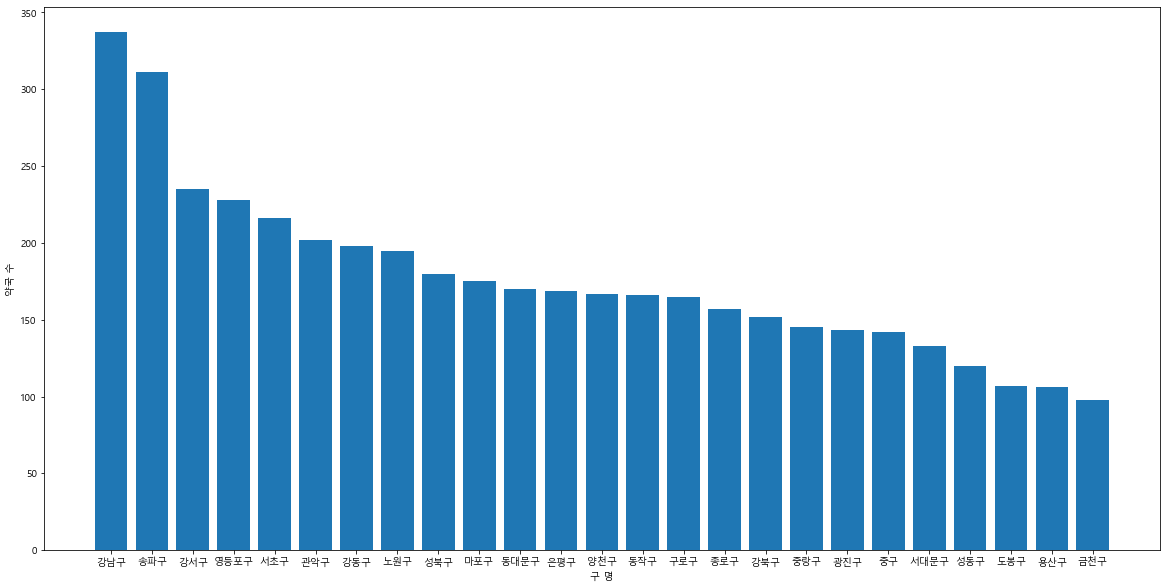

In [186]:
plt.figure(figsize=(20,10))
plt.bar(group['구'], group['약국명'])
plt.xlabel('구 명')
plt.ylabel('약국 수')
plt.show